In [44]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

DATA_DIR = 'C:/Users/WSU/Desktop/AI\Sec/Data_1'
os.listdir(DATA_DIR)

['test.csv', 'train.csv']

In [45]:
DATA_DIR = 'C:/Users/WSU/Desktop/AI\Sec/Data_1'
data_files = sorted([os.path.join(DATA_DIR, filename)
for filename in os.listdir(DATA_DIR)], reverse=True)
data_files

['C:/Users/WSU/Desktop/AI\\Sec/Data_1\\train.csv',
 'C:/Users/WSU/Desktop/AI\\Sec/Data_1\\test.csv']

In [46]:
# (1) 데이터프레임을 각 파일에서 읽어온 후 df_list에 추가
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
    
# (2) 두 개의 데이터프레임을 하나로 통합
df = pd.concat(df_list, sort=False)

# (3) 인덱스 초기화
df = df.reset_index(drop=True)

# (4) 결과 출력
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [47]:
# (1) train.csv 데이터의 수
number_of_train_dataset = df.Survived.notnull().sum()

# (2) test.csv 데이터의 수
number_of_test_dataset = df.Survived.isnull().sum()

# (3) train.csv 데이터의 y 값 추출
y_true = df.pop("Survived")[:number_of_train_dataset]
print(y_true)

0     0.00
1     1.00
2     1.00
3     1.00
4     0.00
      ... 
886   0.00
887   1.00
888   0.00
889   1.00
890   0.00
Name: Survived, Length: 891, dtype: float64


In [48]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [49]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.00,38.00,26.00,35.00,35.00
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.28,7.92,53.10,8.05
Cabin,NaN,C85,NaN,C123,NaN


In [50]:
# (1) 데이터를 소수점 두 번째 자리까지 출력
pd.options.display.float_format = '{:.2f}'.format

# (2) 결측치 값의 합을 데이터의 개수로 나눠 비율로 출력
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [51]:
df[df["Age"].notnull()].groupby(
    ["Sex"])["Age"].mean()

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [52]:
df[df["Age"].notnull()].groupby(
    ["Pclass"])["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [53]:
df["Age"].fillna(
    df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

In [54]:
df.loc[61,"Embarked"] = "S"
df.loc[829,"Embarked"] = "S"

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [56]:
object_columns = ["PassengerId", "Pclass", "Name", "Sex",
                  "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)
    
for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)
    
df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

In [57]:
def merge_and_get(ldf, rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf, how=how, left_index=True,
                        right_index=True)
    else:
        return pd.merge(ldf,rdf, how=how, on=on)

In [58]:
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["Sex"], prefix="Sex"), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(
        df["Pclass"], prefix="Pclass"), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(
        df["Embarked"], prefix="Embarked"), on=None, index=True)

C:\Users\WSU\AppData\Local\Temp\ipykernel_9640\2898911767.py:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  one_hot_df, pd.get_dummies(


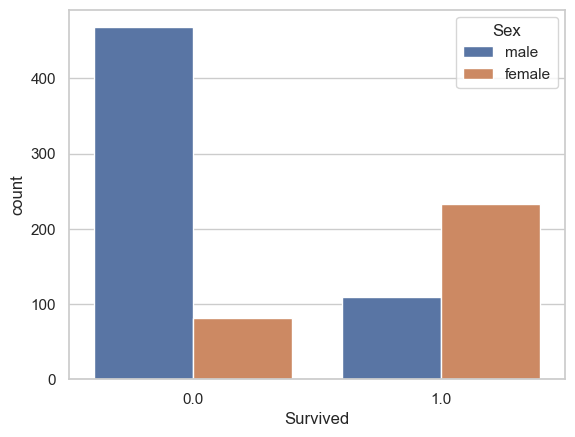

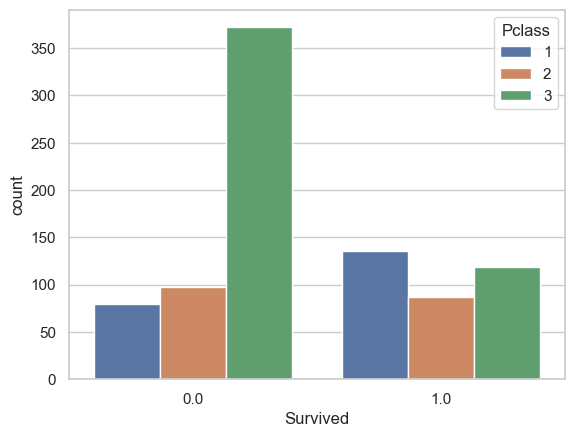

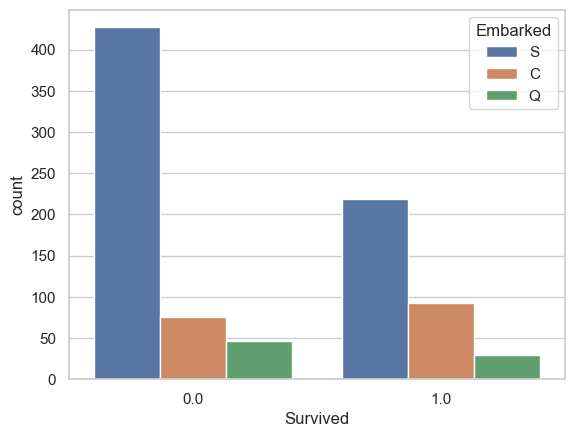

In [59]:
temp_columns = ["Sex", "Pclass", "Embarked"]

for col_name in temp_columns:
    temp_df = pd.merge(
        one_hot_df[col_name], y_true, left_index=True, right_index=True)
    sns.countplot(x="Survived", hue=col_name, data=temp_df)
    plt.show()

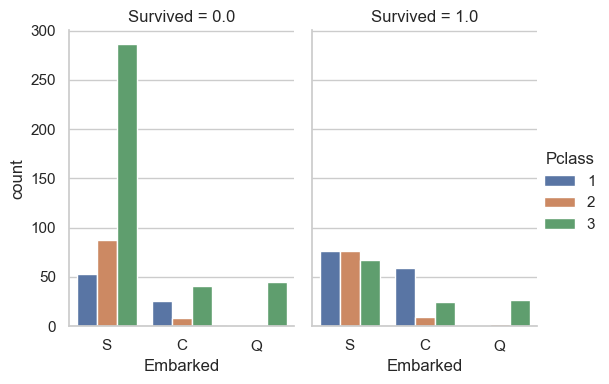

In [60]:
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)
g = sns.catplot(x="Embarked",
                hue="Pclass",
                col="Survived",
                data=temp_df,
                kind="count",
                height=4, aspect=.7);

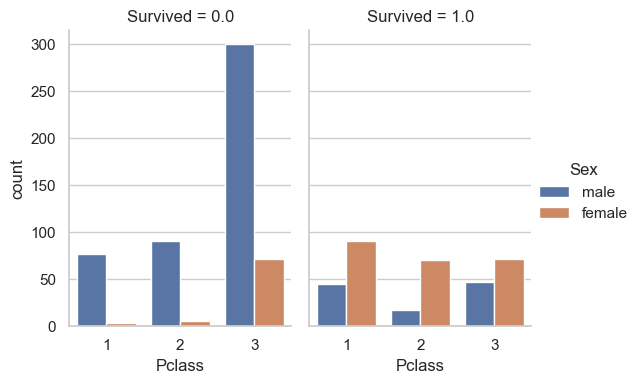

In [61]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index=True,
    right_index=True)
g = sns.catplot(x="Pclass",
                hue="Sex", col="Survived",
                data=temp_df, kind="count",
                height=4, aspect=.7)

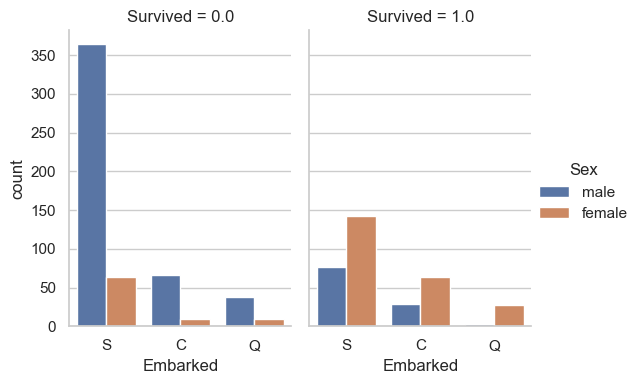

In [62]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index=True,
    right_index=True)

g = sns.catplot(
    x="Embarked", hue="Sex",
    col="Survived",
    data=temp_df, kind="count",
    height=4, aspect=.7);

C:\Users\WSU\AppData\Local\Temp\ipykernel_9640\2002286657.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = temp_df.corr()


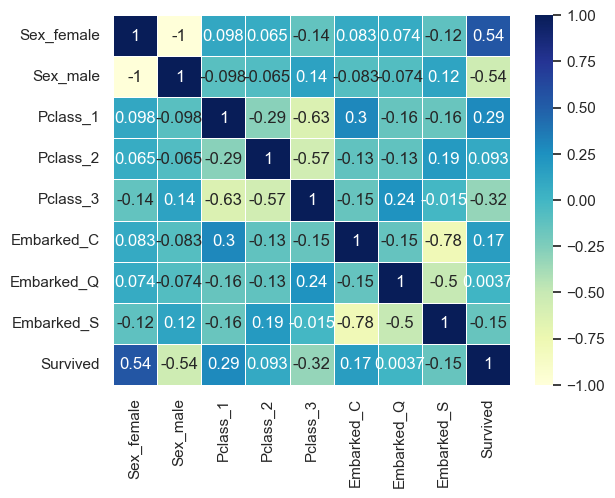

In [63]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
if col_name.split("_")[0] in temp_columns and "_" in col_name ] + ["Sex"]

# temp열
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true,
                   left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")